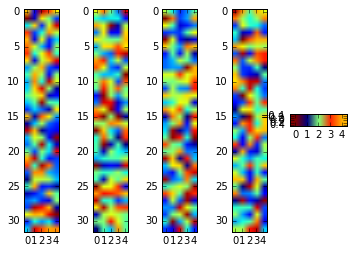

In [1]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt 

df = np.random.rand( 129, 5 )

length = 32

for index, start_pos in enumerate( range( 0, len( df ), length ) ):
    plt.subplot( 1, 5, index + 1 )
    plt.imshow( df[ start_pos : start_pos + length , : ] )

In [2]:
print list( range( 0, len( df ), length ) ) 


[0, 32, 64, 96, 128]


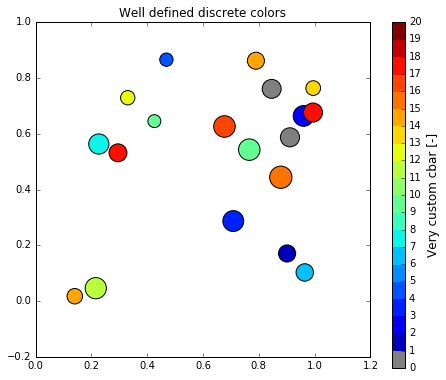

In [3]:
import matplotlib as mpl

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = np.random.rand(20)
y = np.random.rand(20)
tag = np.random.randint(0,20,20)
tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,20,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12)

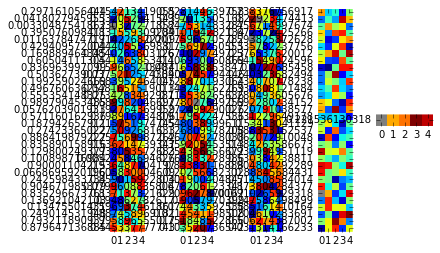

In [4]:
df = np.random.rand( 129, 5 )

length = 32
ii = range( 0, len( df ), length )

for index, start_pos in enumerate( ii ):
    my_dat = df[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    plt.yticks( range( len( my_dat ) ), my_dat[ : , 0 ] )

In [8]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 

df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

# data transformation 

my_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 

df = df[ my_cols ] 

df[ 'tm' ] = df[ 'tm' ] - 39.93
df[ 'kcat' ] = np.log10( df[ 'kcat' ] / 880. ) 
df[ 'km' ] = np.log10( df[ 'km' ] / 5. ) 
df[ 'kcatkm' ] = np.log10( df[ 'kcatkm' ] / 174000. ) 

# sanity check 
print df.loc[ 'BglB' ]
print df.loc[ 'Q19A' ]
print df.loc[ 'R240A' ]

df.describe() #( include='all' ) 

expression    1.0
tm            0.0
kcat          0.0
km            0.0
kcatkm        0.0
Name: BglB, dtype: float64
expression    1.000000
tm                 NaN
kcat               NaN
km                 NaN
kcatkm       -4.199157
Name: Q19A, dtype: float64
expression    1.000000
tm           -0.030000
kcat          1.097344
km            0.590173
kcatkm        0.512085
Name: R240A, dtype: float64


,expression,tm,kcat,km,kcatkm
count,129.000000,69.000000,80.000000,80.000000,92.000000
mean,0.713178,-0.590725,-0.836934,0.172412,-1.449682
std,0.454041,1.618392,0.948346,0.391784,1.515885
min,0.000000,-5.680000,-2.944483,-1.096910,-4.240549
25%,0.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN
max,1.000000,2.720000,1.097344,1.251297,0.955350


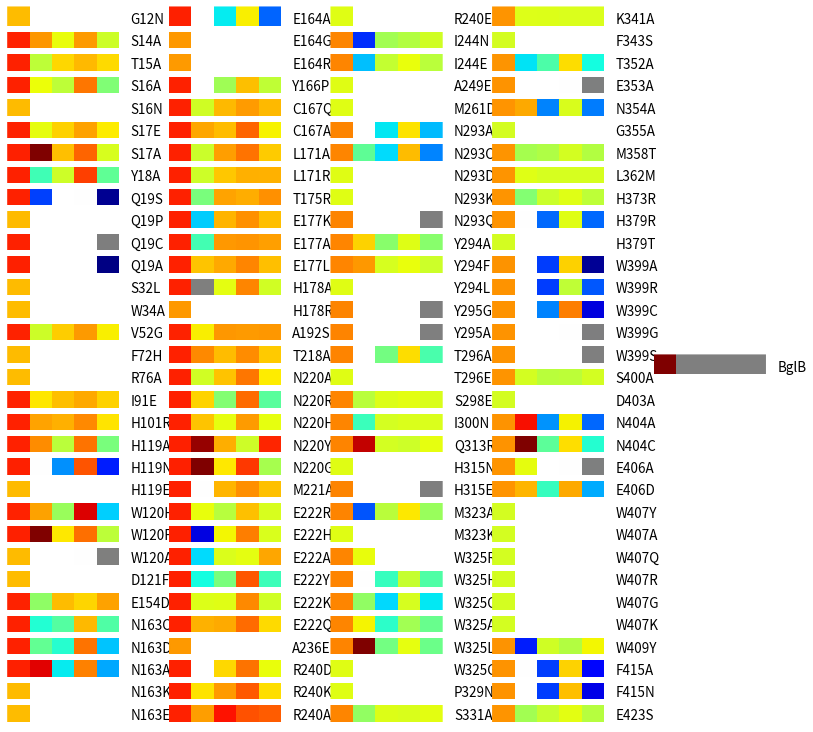

In [6]:
length = 32
ii = range( 0, len( df ), length )

plt.figure( figsize=(14,14) )
for index, start_pos in enumerate( ii ):
    my_dat = df.ix[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.tick_params( length=0 )
    plt.xticks([]); plt.yticks([])
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    #plt.yticks( range( len( my_dat ) ), my_dat.index )
    
    font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
    for i, r in enumerate( my_dat.index ):
        plt.text( 5, i+0.25, r, fontdict=font )
        plt.plot( [ -.5, len( ii ) + .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) # cell borders

In [9]:
# print help( cmap.from_list )
               
# my_colors = [
#     ( .11, .19, .36 ), # deep blue
#     ( .46, .57, .66 ), # medium blue
#     ( .71, .76, .80 ), # light blue 
#     ( .92, .92, .92 ), # grey 
#     ( .92, .88, .74 ), # light yellow
#     ( .88, .80, .51 ), # medium yellow 
#     ( .81, .63, 0. ),  # deep yellow 
# ]

# my_vals = [
#     ( 1, ( .11, .19, .36 ) ), # deep blue
#     ( .9, ( .46, .57, .66 ) ), # medium blue
#     ( .8, ( .71, .76, .80 ) ), # light blue 
#     ( .7, ( .92, .92, .92 ) ), # grey 
#     ( .1, ( .92, .88, .74 ) ), # light yellow
#     ( .01, ( .88, .80, .51 ) ), # medium yellow 
#     ( 0, ( .81, .63, 0. ) ),  # deep yellow 
# ]

# my_cmap = cmap.from_list( 'my_cmap', my_colors, N=len(my_colors), gamma=1 )
# plt.imshow( np.random.rand( 10, 10 ), interpolation='none', cmap=my_cmap ) 

# my_c = cmap.from_list( 'my_c', my_vals, N=len(my_vals), gamma=1.)
# plt.imshow( np.random.rand( 10, 10 ), interpolation='none', cmap=my_c ) 

ERROR! Session/line number was not unique in database. History logging moved to new session 8


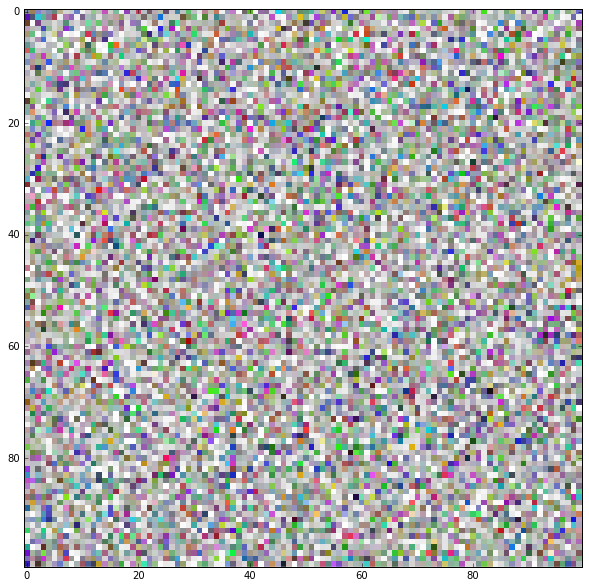

In [25]:
big = 100
plt.figure( figsize=(np.sqrt(big),np.sqrt(big)))
the_array = np.array( [ [ tuple( np.random.rand( 4 ) ) for i in range( big ) ] for j in range( big ) ] )
plt.imshow( the_array, interpolation='none', cmap='viridis' )

In [26]:
import pandas 

my_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ]


df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )
df

,sequence_pos,expression,tm,why_no_tm,kcat,km,kcatkm,ki,eki,percent_err_kcat,...,percent_err_km,err_km,err_kcatkm,in_plos_paper,gel_number,k,err_tm,err_k,Siena gel levels,Alex gel levels
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,no expression,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,16.0,NaN,NaN,NaN,0,NaN
S14A,14.0,1,40.16,NaN,320.0,8.25,38823.0,NaN,NaN,3.4,...,12.4,1.02,4972.0,1,9.0,-1.72,0.30,0.37,1,NaN
T15A,15.0,1,39.17,NaN,614.0,5.30,115849.0,NaN,NaN,2.4,...,9.0,0.48,1.7,0,2.0,-0.58,0.23,0.07,1,NaN
S16A,16.0,1,39.52,NaN,154.0,14.01,10997.0,NaN,NaN,0.6,...,2.9,0.40,331.0,1,5.0,NaN,NaN,NaN,1,NaN
S16N,16.0,0,NaN,below detection,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,8.0,NaN,NaN,NaN,0.5,NaN
S17E,17.0,1,39.47,NaN,641.0,7.32,87596.0,NaN,NaN,1.4,...,5.2,0.38,4719.0,1,15.0,-0.82,0.14,0.08,0.5,NaN
S17A,17.0,1,41.66,NaN,848.0,18.45,45978.0,NaN,NaN,9.0,...,20.2,3.72,10135.0,1,9.0,-1.31,0.14,0.44,1,NaN
Y18A,18.0,1,38.26,NaN,197.0,31.55,6230.0,NaN,NaN,4.6,...,11.4,3.61,773.0,1,2.0,-0.47,0.23,0.04,0.5,NaN
Q19S,19.0,1,36.82,NaN,NaN,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,3.0,1,14.0,-0.58,0.18,0.05,1,NaN


In [41]:
tm = 39.9 
my_tm = []
for val in df[ 'tm' ]:
    if val == np.nan:
        my_tm.append( val )
    elif 38.9 < val < 40.9 :
        my_tm.append( ( 0,0,0,0.5) ) # grey 
    elif val >= 40.9:
        my_tm.append( ( 1,0,0,1 ) )
    else:
        my_tm.append( ( 0,0,0,0 ) )
print my_tm        

[(0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0.5), (1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (1, 0, 0, 1), (1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0.5), (0, 0, 0, 0.5), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 

In [39]:
# construct each column [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 
# as a row and then transpose later ;) 

def my_func( col ):
    
    maps = {
        'expression': lambda x: 'rgba(0,0,0,{})'.format(x),
        'tm': lambda x: x if x == np.nan else (0,0,0,0.5) if abs(x-39.93)<1 else (1,0,0,1) if x-39.93>1
        'kcat': lambda x: (0,0,0,x),
        'km': lambda x: (0,0,0,x),
        'kcatkm': lambda x: (0,0,0,x),
    }
    
    kkk = df[ col ].map( maps[ col ] )
    #return [ np.random.rand() for i in range( 129 ) ]
    return kkk 

my_map = []
for col in my_cols:
    my_map.append( my_func( col ) )
    
my_df = pandas.DataFrame( np.array( my_map ).T, columns=my_cols ) 
my_df

SyntaxError: invalid syntax (<ipython-input-39-09ef828cdd63>, line 8)